In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
from scipy.spatial import distance
from sklearn.metrics.pairwise import haversine_distances
import functions as f

# Always make it pretty. Always.
plt.style.use('ggplot')

In [4]:
# df = f.cleaner_data(f.load_and_clean_accident_data())
df1 = f.load_new_accident_data()
# df = pd.read_csv('data/accidentswTraffic.csv')


In [5]:
# traffic = f.load_and_clean_traffic_data()
traffic = f.load_and_clean_traffic_data()

//anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3248: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [12]:
# f.connectTrafficData(df1,traffic)
# df1.to_csv('data/finalTable.csv')
df1 = pd.read_csv('data/finalTable.csv')
# df1.drop( columns=['Unnamed: 0'], inplace=True )
# df1.to_csv('data/finalTable.csv')

In [13]:
# df1.drop( columns=['Unnamed: 0'], inplace=True )
df1.columns

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Year', 'CP', 'Traffic', 'CPlatitude',
       'CPlongitude'],
      dtype='object')

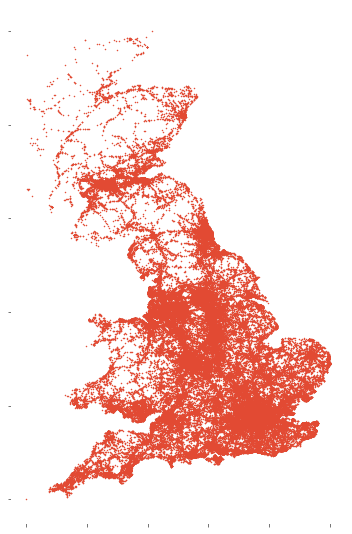

In [11]:
f.mainGraphAccidentData(df1)
# 
# df2 = df1[df1['Year'] == 2005].copy()
# df2 = df2[df2['Location_Northing_OSGR'] < 980000].copy()
# df2 = df2[df2['Longitude'] > -6.3].copy()

# latitudes = (df2.Latitude - df2.Latitude.values.min())/(df2.Latitude.values.max() - df2.Latitude.values.min())
# longitudes = (df2.Longitude.values - df2.Longitude.values.min())/(df2.Longitude.values.max() - df2.Longitude.values.min())

# fig, ax = plt.subplots(figsize= (6,9.5))

# ax.plot(CoastLatitudes, CoastLongitudes, alpha=1, c='black')

# ax.scatter(longitudes, latitudes, s=1, alpha=1)
# ax.set_yticklabels([])
# ax.set_xticklabels([])
# ax.grid(False)
# ax.set_facecolor('xkcd:white')

# fig.savefig('CoastingIsDifficult.png',format='png')


In [ ]:
df2['Location_Northing_OSGR'].max()

In [ ]:
casualties = dict(df.groupby(['CP'])['Number_of_Casualties'].agg('sum'))
accidents = dict(df.groupby(['CP'])['Number_of_Casualties'].agg('count'))

df['TotalCasualtiesPerCP'] = df['CP'].map(casualties)
df['TotalAccidentsPerCP'] = df['CP'].map(accidents)

traffic['TotalCasualties'] = traffic['count_point_id'].map(casualties)
traffic['TotalAccidents'] = traffic['count_point_id'].map(accidents)

In [ ]:
df['numCasualtiesAtCheckpoint'] = df.groupby(['CP','Year'])['Number_of_Casualties'].transform('sum')
df['numAccidentsAtCheckpoint'] = df.groupby(['CP','Year'])['Number_of_Casualties'].transform('count')

In [ ]:
traffic_data = np.unique(df[['Year','CP','numCasualtiesAtCheckpoint','numAccidentsAtCheckpoint']].values,axis=0).astype(int)

In [ ]:
traffic['numCasualties'] = traffic_zeros
traffic['numAccidents'] = traffic_zeros

traffic['CPYEARKEY'] = traffic['count_point_id'].values.astype(str) + traffic['year'].values.astype(str)

traffic.head()
# for i in range(len(traffic)):
#     traffic['numCasualties'] = df.groupby
#     traffic[np.logical_and(traffic['year'] == t[0], traffic['count_point_id'] == t[1])].numCasualties = t[2]
#     traffic[np.logical_and(traffic['year'] == t[0], traffic['count_point_id'] == t[1])].numAccidents = t[3]

            

In [ ]:
years = df.groupby(['Year']).count()['Accident_Index']
fig, ax = plt.subplots()
ax.bar(years.index, years.values)
ax.set_title('Total Number of Accidents per Year')
fig.savefig('TotalNumberAccidentsPerYear.png',format='png')
None

In [ ]:
# df1 = df[df['Year'] == 2005].copy()
# df1 = df[df['Location_Northing_OSGR'] < 991090].copy()
# df1= df[df['Accident_Severity'] == 1]

eastings = (df1.Location_Easting_OSGR.values - df1.Location_Easting_OSGR.values.min())/(df1.Location_Easting_OSGR.values.max() - df1.Location_Easting_OSGR.values.min())
northings = (df1.Location_Northing_OSGR.values - df1.Location_Northing_OSGR.values.min())/(df1.Location_Northing_OSGR.values.max() - df1.Location_Northing_OSGR.values.min())

In [ ]:
fig, ax = plt.subplots(figsize= (5.5,11))

ax.scatter(eastings, northings * 4, s=1, alpha=1)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.grid(False)
ax.set_facecolor('xkcd:white')

# fig.savefig('MapofallSeverity1Accidents.png',format='png')

None

In [ ]:
df.columns

In [ ]:
new_traffic = pd.DataFrame(np.unique(df[['Year','CP']].values.astype(int),axis=0), columns= ['Year','CP']).copy()

In [ ]:
traffic.columns

In [ ]:
for year, CP in new_traffic.values[:5]:
    print (year,CP)
    

In [ ]:
traffic1 = traffic[traffic['CasualtiesPerMV'] < 20000]
traffic1 = traffic1[traffic1['AADFYear'] == 2005]

eastings = (traffic1.Easting.values - traffic1.Easting.values.min())/(traffic1.Easting.values.max() - traffic1.Easting.values.min())
northings = (traffic1.Northing.values - traffic1.Northing.values.min())/(traffic1.Northing.values.max() - traffic1.Northing.values.min())

In [ ]:
fig, ax = plt.subplots(figsize= (6,9.5))

cs = ax.scatter(eastings, northings * 4, cmap='Greys', c=(traffic1['CasualtiesPerMV'].values), s=1, alpha=1) 
#c=traffic1['CasualtiesPerMV'].values/traffic1['CasualtiesPerMV'].max(),
#/traffic1['CasualtiesPerMV'].max()
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.grid(False)
fig.colorbar(cs)
None

In [ ]:
Ebegin = df['Location_Easting_OSGR'].min()
Eend = df['Location_Easting_OSGR'].max()
Nbegin = df['Location_Northing_OSGR'].min()
Nend = df['Location_Northing_OSGR'].max()

In [ ]:
# df1 = df[df['Year'] == 2005].copy()
df1 = df[df['Location_Easting_OSGR'] < (Ebegin + (Eend-Ebegin)*9/10)].copy()
df1 = df1[df1['Location_Easting_OSGR'] > (Ebegin + (Eend-Ebegin)*6/10)].copy()
df1 = df1[df1['Location_Northing_OSGR'] > (Ebegin + (Eend-Ebegin)/10)].copy()
df1 = df1[df1['Location_Northing_OSGR'] < (Ebegin + (Eend-Ebegin)*3/10)].copy()
# df1= df1[df1['Accident_Severity'] == 1]

eastings = (df1.Location_Easting_OSGR.values - df1.Location_Easting_OSGR.values.min())/(df1.Location_Easting_OSGR.values.max() - df1.Location_Easting_OSGR.values.min())
northings = (df1.Location_Northing_OSGR.values - df1.Location_Northing_OSGR.values.min())/(df1.Location_Northing_OSGR.values.max() - df1.Location_Northing_OSGR.values.min())

In [ ]:
fig, ax = plt.subplots(figsize= (12,9.5))

ax.scatter(eastings, northings * 4, s=1, alpha=1)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.grid(False)
ax.set_facecolor('xkcd:white')

fig.savefig('MapofSeverity1inLondon.png',format='png')
None

In [ ]:
traffic['CasualtiesPerMMD'] = traffic['numCasualties'] / traffic['link_length_miles'] / traffic['all_motor_vehicles'] * 1000000
traffic['AccidentsPerMMD'] = traffic['numAccidents'] / traffic['link_length_miles'] / traffic['all_motor_vehicles'] * 1000000

In [ ]:
traffic['numCasualties'].max()

In [ ]:
traffic1 = traffic[traffic['CasualtiesPerMMD'] < 20000]
traffic1 = traffic1[traffic1['year'] == 2005]

eastings = (traffic1.easting.values - traffic1.easting.values.min())/(traffic1.easting.values.max() - traffic1.easting.values.min())
northings = (traffic1.northing.values - traffic1.northing.values.min())/(traffic1.northing.values.max() - traffic1.northing.values.min())

fig, ax = plt.subplots(figsize= (6,9.5))

cs = ax.scatter(eastings, northings * 4, cmap='Greys', c=(traffic1['CasualtiesPerMMD'].values), s=1, alpha=1) 
#c=traffic1['CasualtiesPerMV'].values/traffic1['CasualtiesPerMV'].max(),
#/traffic1['CasualtiesPerMV'].max()
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.grid(False)
fig.colorbar(cs)
None

In [ ]:
traffic.head()

In [ ]:
df.columns

In [ ]:
df[['CP','Year']] == [48544,2005]

In [ ]:
traffic.columns

In [ ]:
df.columns

In [ ]:
for cp in df.loc[:5,'CP']:
    print(cp)

In [ ]:
#this attaches CP location to accident table

df['CPnorthing'] = np.zeros(len(df))
df['CPneasting'] = np.zeros(len(df))

for i, cp in enumerate(df['CP']):

    df.loc[i,'CPnorthing'] = traffic[traffic['count_point_id'] == cp].northing.mean()
    df.loc[i,'CPeasting'] = traffic[traffic['count_point_id'] == cp].easting.mean()

In [ ]:
traffic.columns

In [14]:
import json
import numpy as np
from matplotlib import pyplot as plt

data = json.load(open("custom.geo.json"))
shapes = [x[0] for x in data["features"][0]["geometry"]["coordinates"]]
uk = shapes[39]
CoastLatitudes = ( np.array( shapes[39] ).T[0] - np.array( shapes[39] ).T[0].min() ) / (np.array( shapes[39] ).T[0].max() - np.array( shapes[39] ).T[0].min() )
CoastLongitudes = ( np.array( shapes[39] ).T[1] - np.array( shapes[39] ).T[1].min() ) / (np.array( shapes[39] ).T[1].max() - np.array( shapes[39] ).T[1].min() )


In [ ]:
df2['Longitude'].min()